##Assignment 2
Download any classification dataset and use SVM and Random Forest to classify it.
1. Split the dataset and tabulate the result.
2. Use 10 fold cross validation and tabulate the result.
3. Change the hyperparameters of SVM and Random Forest and plot the accuracy.

### About the Dataset:

The dataset used is from [Kaggle](https://www.kaggle.com/uciml/mushroom-classification) and includes descriptions of samples corresponding to 23 species of mushrooms. Each species is identified as **edible or poisonous**. Our goal is to build a machine learning model using SVM and random forest and predict whether a mushroom is poisonous or edible based on provided features.

#### Content: 
The mushrooms dataset contains below features:
* **cap-shape**: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
* **cap-surface**: fibrous=f, grooves=g, scaly=y, smooth=s
* **cap-color**: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
* **bruises?**: bruises=t, no=f
* **odor**: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
* **gill-attachment**: attached=a, descending=d, free=f, notched=n
* **gill-spacing**: close=c, crowded=w, distant=d
* **gill-size**: broad=b, narrow=n
* **gill-color**: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
* **stalk-shape**: enlarging=e, tapering=t
* **stalk-root**: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
* **stalk-surface-above-ring**: fibrous=f, scaly=y, silky=k, smooth=s
* **stalk-surface-below-ring**: fibrous=f, scaly=y, silky=k, smooth=s
* **stalk-color-above-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
* **stalk-color-below-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
* **veil-type**: partial=p, universal=u
* **veil-color**: brown=n, orange=o, white=w, yellow=y
* **ring-number**: none=n, one=o, two=t
* **ring-type**: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
* **spore-print-color**: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
* **population**: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
* **habitat**: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d


###Importing Required Packages/Libraries
The required libraries as well as the packages needed to use this libraries is imported.

In [ ]:
import numpy as np
import pandas as pd
import math
import time
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tools.eval_measures import mse, rmse
from sklearn. metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
from sklearn.model_selection import GridSearchCV
%matplotlib inline
warnings.filterwarnings('ignore')

In [83]:
from google.colab import files 
uploaded = files.upload()

Saving mushrooms.csv to mushrooms.csv


### Pandas display option to show more rows and columns:

In [51]:
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Importing the dataset and printing out the first 5 rows

In [84]:
mushrooms = pd.read_csv('mushrooms.csv')
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


### Inspecting column datatype and missing values

In [85]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [86]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [87]:
# Drop them since there's only 1 value:
mushrooms = mushrooms.drop('veil-type', axis=1)

### Ploting categorical variables against class to detect any relationship

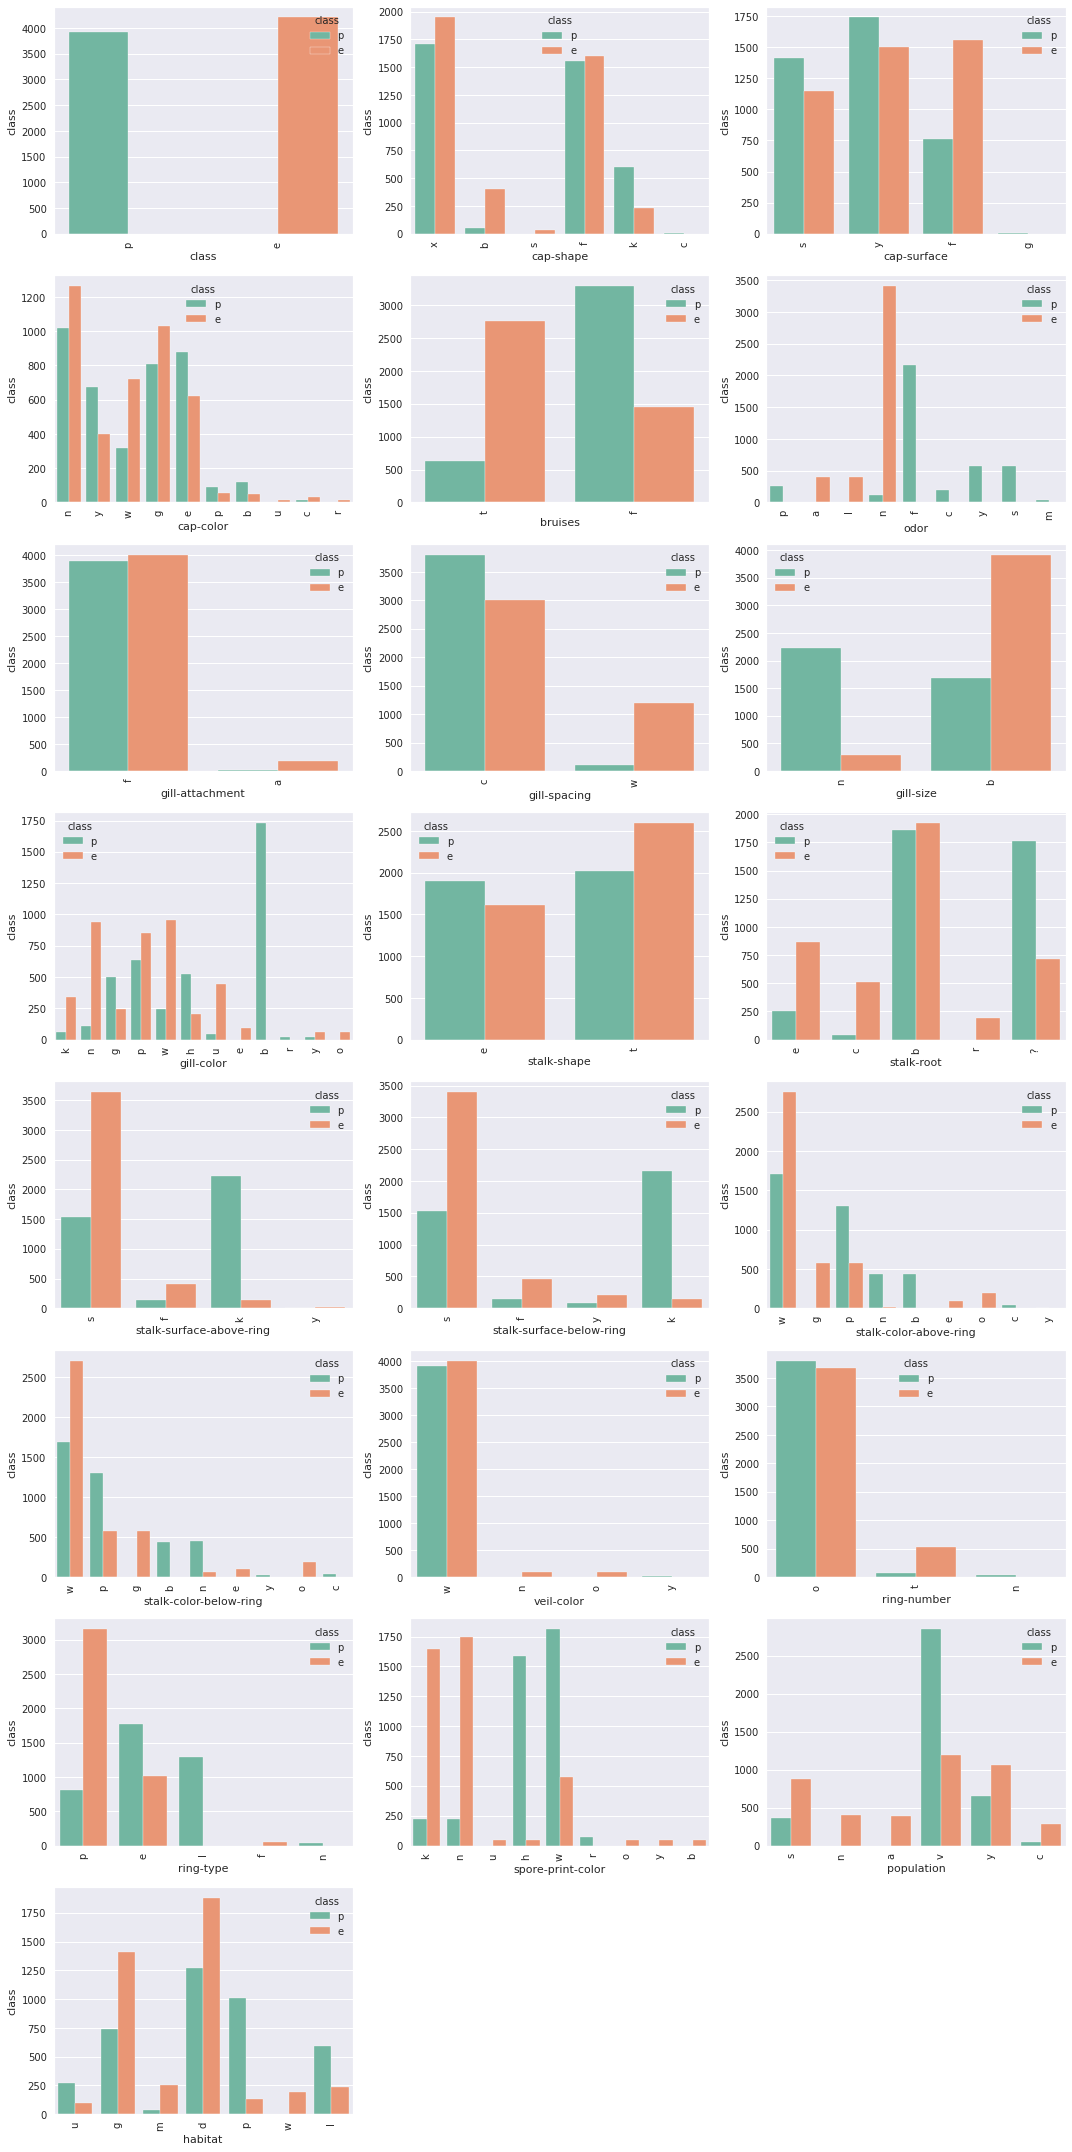

In [88]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,30))
for i, col in enumerate(mushrooms.columns):
    fig.add_subplot(8,3,i+1)
    sns.countplot(mushrooms[col], hue = mushrooms['class'], palette = 'Set2')
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.ylabel('class')
fig.tight_layout()
fig.show()

### Using label encoder to encode our categorical variables:

In [89]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in mushrooms.columns:
    mushrooms[col] = encoder.fit_transform(mushrooms[col])

In [ ]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


##### According to the encoder, class 1 = poisonous, class 0 = edible

### Understanding pair wise correlation of all columns

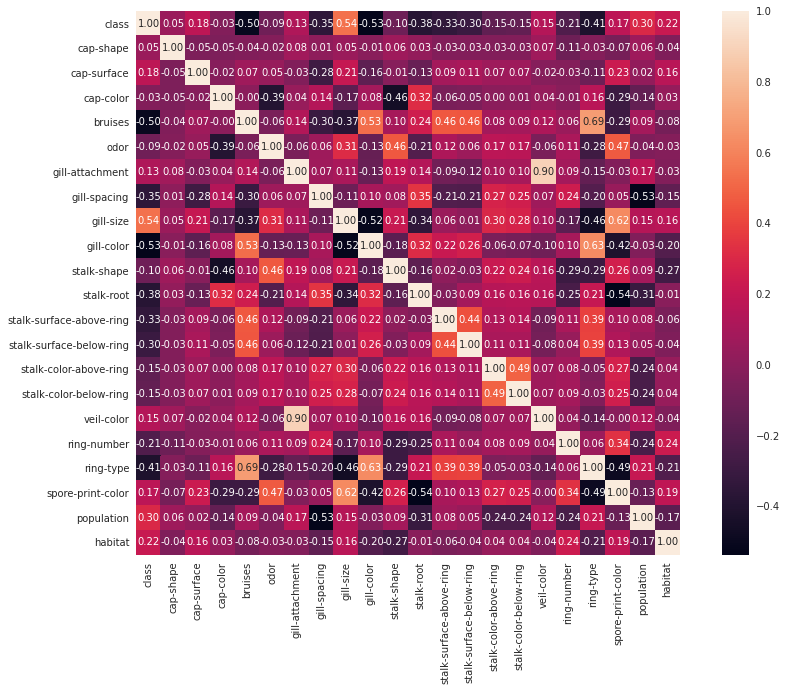

In [90]:
corr = mushrooms.corr() 

plt.figure(figsize=(15,10))
sns.heatmap(corr, cbar=True, annot=True, square=True, 
            fmt='.2f', annot_kws={'size': 10})

### Eliminating highly correlated variables to avoid multicollinearity:

In [91]:
mushrooms = mushrooms.drop('veil-color', axis=1)

### Separating our data into target and explanatory variables:

In [92]:
y = mushrooms['class'] # target variable
X = mushrooms.drop('class', axis=1) # explanatory variables
print(y.shape)
print(X.shape)

(8124,)
(8124, 20)


In [93]:
# Checking for any class imbalance:
y.value_counts()

0    4208
1    3916
Name: class, dtype: int64

### Spliting the data into train set and test set in 80:20 ratio:

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print (X_train.shape, X_test.shape)
print (y_train.shape, y_test.shape)

(6499, 20) (1625, 20)
(6499,) (1625,)


### Building the models:

In [107]:
# Random forest classification:
from sklearn import ensemble
# Support vector machine classifier:
from sklearn.svm import SVC
models = []
results = []
names = []
models.append(('RFC', ensemble.RandomForestClassifier(max_depth = 2, n_estimators=5)))
models.append(('SVM', SVC(gamma = 1)))

for name, model in models:
  kfold = KFold(n_splits=10, random_state=3)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  print(cv_results)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
  print(msg)

[0.92615385 0.90769231 0.94153846 0.91538462 0.84461538 0.92615385
 0.84615385 0.92461538 0.91076923 0.85824345]
RFC: 0.900132 (0.034382)
[0.96923077 0.98       0.98307692 0.98769231 0.98153846 0.97692308
 0.97076923 0.98153846 0.96461538 0.98305085]
SVM: 0.977844 (0.006954)


<bound method Visualizer.poof of CVScores(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc694843eb8>,
         cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
         model=None, scoring='accuracy')>

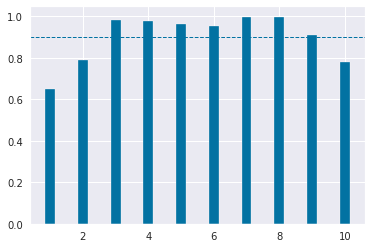

In [96]:
_, ax = plt.subplots()
cv = StratifiedKFold(10)
oz = CVScores(ensemble.RandomForestClassifier(max_depth = 2, n_estimators=5), ax = ax, cv = cv, scoring = 'accuracy')
oz.fit(X, y)
oz.poof


<bound method Visualizer.poof of CVScores(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc68bf1c710>,
         cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
         model=None, scoring='accuracy')>

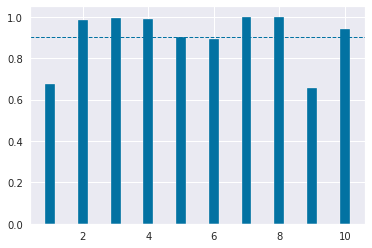

In [109]:
_, ax = plt.subplots()
cv = StratifiedKFold(10)
oz = CVScores(SVC(gamma = 1),ax = ax, cv = cv, scoring = 'accuracy')
oz.fit(X, y)
oz.poof

In [110]:
for name, model in models:
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  print(name)
  print(accuracy_score(y_test, predictions))
  print(classification_report(y_test, predictions))

RFC
0.9870769230769231
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       845
           1       1.00      0.97      0.99       780

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

SVM
0.9846153846153847
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       845
           1       1.00      0.97      0.98       780

    accuracy                           0.98      1625
   macro avg       0.99      0.98      0.98      1625
weighted avg       0.99      0.98      0.98      1625



=== Confusion Matrix ===
[[845   0]
 [ 21 759]]




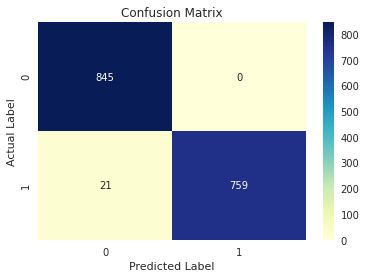

In [111]:
for name, model in models:
  predict = model.predict(X_test)
  print("=== Confusion Matrix ===")
  print(confusion_matrix(y_test, predict))
  print('\n')
  cnf_matrix = confusion_matrix(y_test, predict)
  p = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
  plt.title('Confusion Matrix', y = 1.1)
  plt.ylabel('Actual Label')
  plt.xlabel('Predicted Label')
  break

=== Confusion Matrix ===
[[845   0]
 [ 25 755]]




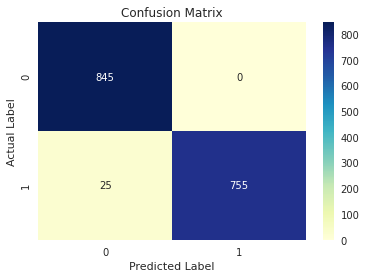

In [112]:
for name, model in models:
  if name == 'RFC':
    continue
  predict = model.predict(X_test)
  print("=== Confusion Matrix ===")
  print(confusion_matrix(y_test, predict))
  print('\n')
  cnf_matrix = confusion_matrix(y_test, predict)
  p = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
  plt.title('Confusion Matrix', y = 1.1)
  plt.ylabel('Actual Label')
  plt.xlabel('Predicted Label')
  break

## Hyperparameter tuning for SVM


In [113]:
param_grid = {'C': [0.25, 0.60, 0.9], 'gamma': [1, 10],'kernel': ['rbf', 'sigmoid']}
kfold = KFold(n_splits=10, random_state=3)
grid = GridSearchCV(SVC(),param_grid,cv = kfold, refit=True,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] C=0.25, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=0.25, gamma=1, kernel=rbf, total=   2.8s
[CV] C=0.25, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV] ...................... C=0.25, gamma=1, kernel=rbf, total=   2.8s
[CV] C=0.25, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.25, gamma=1, kernel=rbf, total=   2.8s
[CV] C=0.25, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.25, gamma=1, kernel=rbf, total=   2.8s
[CV] C=0.25, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.25, gamma=1, kernel=rbf, total=   2.8s
[CV] C=0.25, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.25, gamma=1, kernel=rbf, total=   2.8s
[CV] C=0.25, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.25, gamma=1, kernel=rbf, total=   2.8s
[CV] C=0.25, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.25, gamma=1, kernel=rbf, total=   2.8s
[CV] C=0.25, gamma=1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.9min finished


SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


[[845   0]
 [ 25 755]]
0.9764586938485242


Text(0.5, 15.0, 'Predicted Label')

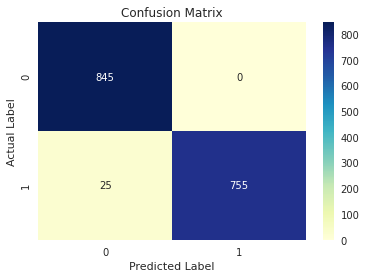

In [114]:
from sklearn.metrics import classification_report
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(grid.best_score_)
cnf_matrix = confusion_matrix(y_test, grid_predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

## Hyperparameter Tuning for RFC

In [115]:
param_grid = {  'bootstrap': [True], 'max_depth': [1, 2, 5], 'max_features': ['auto', 'log2'], 'n_estimators': [2, 3, 5]}
rfc = ensemble.RandomForestClassifier()
#kfold = KFold(n_splits=10, random_state=3)
grid = GridSearchCV(rfc, param_grid = param_grid, refit = True, verbose = 2)
grid.fit(X_train, y_train);
print(grid.best_estimator_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] bootstrap=True, max_depth=1, max_features=auto, n_estimators=2 ..
[CV]  bootstrap=True, max_depth=1, max_features=auto, n_estimators=2, total=   0.0s
[CV] bootstrap=True, max_depth=1, max_features=auto, n_estimators=2 ..
[CV]  bootstrap=True, max_depth=1, max_features=auto, n_estimators=2, total=   0.0s
[CV] bootstrap=True, max_depth=1, max_features=auto, n_estimators=2 ..
[CV]  bootstrap=True, max_depth=1, max_features=auto, n_estimators=2, total=   0.0s
[CV] bootstrap=True, max_depth=1, max_features=auto, n_estimators=2 ..
[CV]  bootstrap=True, max_depth=1, max_features=auto, n_estimators=2, total=   0.0s
[CV] bootstrap=True, max_depth=1, max_features=auto, n_estimators=2 ..
[CV]  bootstrap=True, max_depth=1, max_features=auto, n_estimators=2, total=   0.0s
[CV] bootstrap=True, max_depth=1, max_features=auto, n_estimators=3 ..
[CV]  bootstrap=True, max_depth=1, max_features=auto, n_estimators=3, total=   0.0s
[CV] boot

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=True, max_depth=1, max_features=auto, n_estimators=5, total=   0.0s
[CV] bootstrap=True, max_depth=1, max_features=auto, n_estimators=5 ..
[CV]  bootstrap=True, max_depth=1, max_features=auto, n_estimators=5, total=   0.0s
[CV] bootstrap=True, max_depth=1, max_features=log2, n_estimators=2 ..
[CV]  bootstrap=True, max_depth=1, max_features=log2, n_estimators=2, total=   0.0s
[CV] bootstrap=True, max_depth=1, max_features=log2, n_estimators=2 ..
[CV]  bootstrap=True, max_depth=1, max_features=log2, n_estimators=2, total=   0.0s
[CV] bootstrap=True, max_depth=1, max_features=log2, n_estimators=2 ..
[CV]  bootstrap=True, max_depth=1, max_features=log2, n_estimators=2, total=   0.0s
[CV] bootstrap=True, max_depth=1, max_features=log2, n_estimators=2 ..
[CV]  bootstrap=True, max_depth=1, max_features=log2, n_estimators=2, total=   0.0s
[CV] bootstrap=True, max_depth=1, max_features=log2, n_estimators=2 ..
[CV]  bootstrap=True, max_depth=1, max_features=log2, n_estimators=2, 

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    1.4s finished


[[845   0]
 [ 13 767]]
0.9895362112867886


Text(0.5, 15.0, 'Predicted Label')

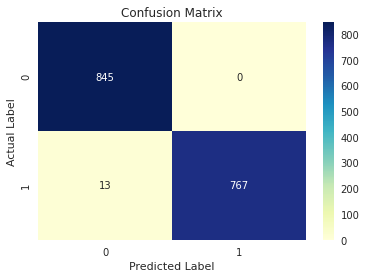

In [116]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
cnf_matrix = confusion_matrix(y_test, grid_predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
print(grid.best_score_)
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

We can conclude that Random Forest classifier performed well in our dataset with a accuracy of 98% compared to Support vector machines(97%)